# **Previsão Previsão do Valor de Imóveis em King County**

### Descrição das Variáveis do Dataset

**id** - ID único para cada casa vendida  

**date** - Data da venda da casa  

**price** - Preço de cada casa vendida  

**bedrooms** - Número de quartos  

**bathrooms** - Número de banheiros, onde **0.5** representa um cômodo com vaso sanitário, mas sem chuveiro  

**sqft_living** - Área interna de convivência da casa *(em pés quadrados)*  

**sqft_lot** - Área total do terreno *(em pés quadrados)*  

**floors** - Número de andares  

**waterfront** - Variável indicadora *(dummy)* que informa se a casa possui vista para a orla ou não  

**view** - Índice de 0 a 4 que indica a qualidade da vista da propriedade  

**condition** - Índice de 1 a 5 que representa a condição da casa  

**grade** - Índice de 1 a 13, onde **1–3** indicam construção e design abaixo do padrão, **7** representa nível médio, e **11–13** indicam alta qualidade de construção e design  

**sqft_above** - Área interna da casa que está acima do nível do solo *(em pés quadrados)*  

**sqft_basement** - Área interna da casa que está abaixo do nível do solo *(em pés quadrados)*  

**yr_built** - Ano em que a casa foi originalmente construída  

**yr_renovated** - Ano da última reforma da casa  

**zipcode** - Código postal da região onde a casa está localizada  

**lat** - Latitude  

**long** - Longitude  

**sqft_living15** - Área de convivência interna média das 15 casas vizinhas mais próximas  

**sqft_lot15** - Área média dos terrenos das 15 casas vizinhas mais próximas  


In [1]:
import pandas as pd
import numpy as np

In [61]:
# Carregar o dataset
df = pd.read_csv('datasets/kc_house_data.csv')

## **Exploração e Tratamento dos Dados** 

In [60]:
# Amostra aleatória de 5 linhas do DataFrame
df.sample(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,years_since_renovation,date_timestamp
8013,230000.0,2,1.00,1430,4000,1.0,0,0,3,7,930,500,1949,98118,47.5233,-122.284,1110,4000,66,1406073600
1199,630000.0,4,3.75,4610,40202,1.0,0,0,4,10,2500,2110,1980,98027,47.4599,-122.000,3050,41056,35,1401926400
16002,450000.0,4,2.50,2450,20348,1.0,0,0,3,8,1410,1040,1978,98075,47.5887,-122.064,2450,50094,37,1414108800
17249,640000.0,3,3.50,2480,10800,2.0,0,0,3,8,2480,0,1998,98074,47.6083,-122.060,2380,11310,17,1407801600
19420,557000.0,4,1.75,2660,11315,2.0,0,0,4,8,2660,0,1983,98074,47.6204,-122.044,1980,11315,32,1418860800


In [57]:
df.shape

(21613, 20)

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
# Valores nulos em cada coluna
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
# Excluir colunas irrelevantes
df = df.drop(columns=['id'])

In [8]:
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [59]:
# Top 5 casas mais caras
df['price'].nlargest(5)

7252    7700000.0
3914    7062500.0
9254    6885000.0
4411    5570000.0
1448    5350000.0
Name: price, dtype: float64

## **Feature Engineering**

In [10]:
# Para imóveis renovados: anos desde renovação
# Para não renovados: anos desde construção
df['years_since_renovation'] = df.apply(
    lambda row: 2015 - row['yr_renovated'] if row['yr_renovated'] > 0 
                else 2015 - row['yr_built'], 
    axis=1
)

df = df.drop('yr_renovated', axis=1)

In [11]:
# Converter para datetime
df['date'] = pd.to_datetime(df['date'], format='ISO8601')

df['date_timestamp'] = df['date'].astype(np.int64) // 10**9  # Segundos desde 1970

# Remover date
df = df.drop('date', axis=1)

In [12]:
df.head(100)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,years_since_renovation,date_timestamp
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,98178,47.5112,-122.257,1340,5650,60,1413158400
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,98125,47.7210,-122.319,1690,7639,24,1418083200
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,98028,47.7379,-122.233,2720,8062,82,1424822400
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,98136,47.5208,-122.393,1360,5000,50,1418083200
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,98074,47.6168,-122.045,1800,7503,28,1424217600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,905000.0,4,2.50,3300,10250,1.0,0,0,3,7,2390,910,1946,98040,47.5873,-122.249,1950,6045,24,1410134400
96,247500.0,3,1.75,1960,15681,1.0,0,0,3,7,1960,0,1967,98032,47.3576,-122.277,1750,15616,48,1427673600
97,199000.0,4,1.50,1160,6400,1.0,0,0,4,7,1160,0,1975,98023,47.3036,-122.378,1160,6400,40,1410480000
98,314000.0,3,1.75,1810,41800,1.0,0,0,5,7,1210,600,1980,98038,47.4109,-121.958,1650,135036,35,1405036800


## **Correlação Linear**

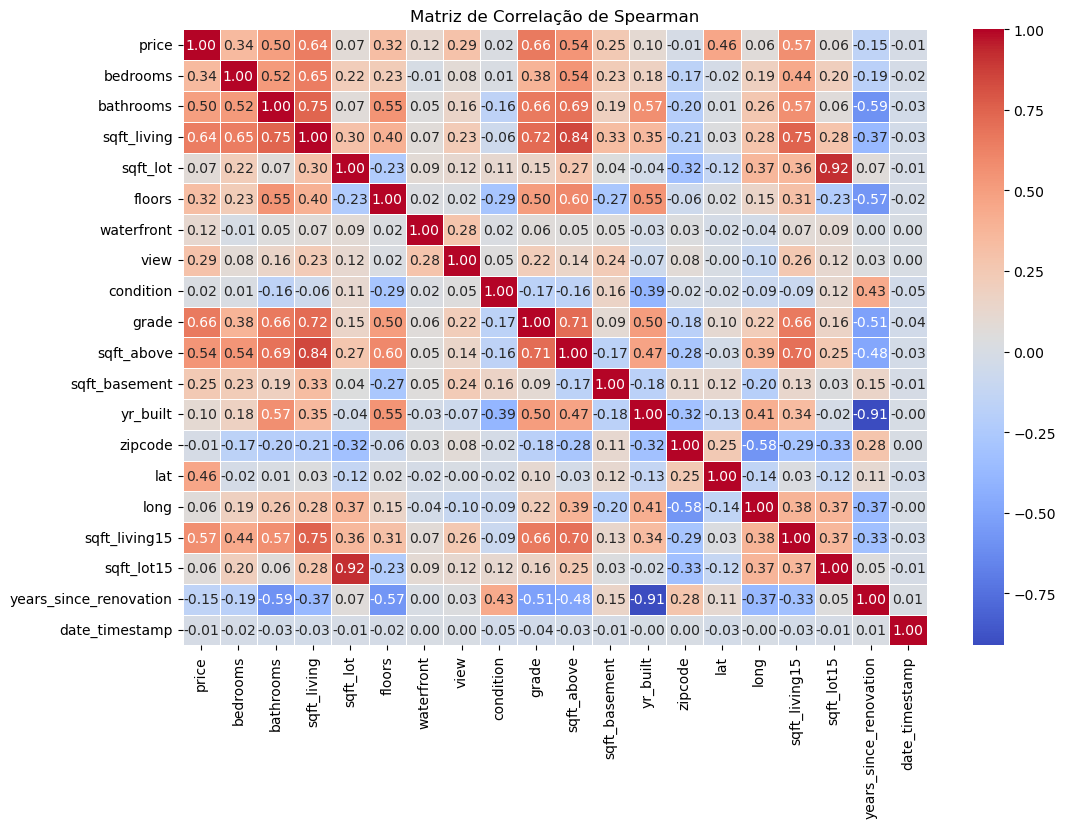

In [13]:
# Spearman correlation
correlacoes = df.corr(method='spearman')

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(correlacoes, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlação de Spearman")
plt.show()


## **Treino e Teste**

In [14]:
# Importar train_test_split
from sklearn.model_selection import train_test_split

# Dividir os dados em variáveis independentes (X) e dependente (y)
X = df.drop('price', axis=1).values
y = df['price'].values

In [15]:
X

array([[3.0000000e+00, 1.0000000e+00, 1.1800000e+03, ..., 5.6500000e+03,
        6.0000000e+01, 1.4131584e+09],
       [3.0000000e+00, 2.2500000e+00, 2.5700000e+03, ..., 7.6390000e+03,
        2.4000000e+01, 1.4180832e+09],
       [2.0000000e+00, 1.0000000e+00, 7.7000000e+02, ..., 8.0620000e+03,
        8.2000000e+01, 1.4248224e+09],
       ...,
       [2.0000000e+00, 7.5000000e-01, 1.0200000e+03, ..., 2.0070000e+03,
        6.0000000e+00, 1.4034816e+09],
       [3.0000000e+00, 2.5000000e+00, 1.6000000e+03, ..., 1.2870000e+03,
        1.1000000e+01, 1.4213664e+09],
       [2.0000000e+00, 7.5000000e-01, 1.0200000e+03, ..., 1.3570000e+03,
        7.0000000e+00, 1.4133312e+09]])

In [16]:
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [17]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)   

## **Escalonar os dados**

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_treino_scaler = scaler.fit_transform(X_treino)
X_teste_scaler = scaler.transform(X_teste)
y_treino_scaler = scaler.fit_transform(y_treino.reshape(-1, 1)).ravel()
y_teste_scaler = scaler.transform(y_teste.reshape(-1, 1)).ravel()

## **Regressão por Vetores de Suporte**

In [19]:
# kernel = rbf, linear, polinomial (poly)
from sklearn.svm import SVR
SVR = SVR(kernel='rbf')
SVR.fit(X_treino_scaler,y_treino_scaler)

SVR()

In [ ]:
SVR.score(X_treino_scaler, y_treino_scaler)

0.8133910315137575

**Teste**

In [21]:
SVR.score(X_teste_scaler, y_teste_scaler)

0.7740358252072945

In [22]:
previsoes_teste = SVR.predict(X_teste_scaler)
previsoes_teste

array([-0.37787862,  0.39554112,  1.57512156, ..., -0.53654664,
        0.88690322, -0.04182175])

**Revertendo a transformação**

In [23]:
y_teste_inverse = scaler.inverse_transform(y_teste_scaler.reshape(-1, 1))
previsoes_inverse = scaler.inverse_transform(previsoes_teste.reshape(-1, 1))

## **Métricas de Avaliação**

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [25]:
# Erro médio Absoluto
mean_absolute_error(y_teste_inverse, previsoes_inverse)

84317.99798626226

In [26]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste_inverse, previsoes_inverse))

np.float64(180614.6842861624)

Resultado: 

R² = 0.81/0.77 

RMSE = 180614.68

## **Regressão com Random Forest**

In [27]:
# Importar RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor


In [28]:
random = RandomForestRegressor(n_estimators=60, criterion='squared_error', max_depth=5, random_state = 10)
random.fit(X_treino, y_treino)

RandomForestRegressor(max_depth=5, n_estimators=60, random_state=10)

In [29]:
random.score(X_treino, y_treino)

0.7988553278539725

**Teste**

In [30]:
random.score(X_teste, y_teste)

0.7406413570808685

In [31]:
previsoes_teste = random.predict(X_teste)
previsoes_teste

array([421874.09818492, 697481.85558546, 939239.04791876, ...,
       343543.05024978, 958776.53051421, 527192.1145926 ])

### **Métricas**

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [33]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

110299.00366402992

In [34]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

np.float64(193501.18272945422)

Resultado: 

R² = 0.80/0.74

RMSE = 193501.18

## **Regressão com XGBoost**

In [35]:
#!pip install xgboost

In [36]:
from xgboost import XGBRegressor

In [37]:
xgboost = XGBRegressor(n_estimators=180, max_depth=3, learning_rate=0.05, objective="reg:squarederror", random_state=10)
xgboost.fit(X_treino, y_treino)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=180,
             n_jobs=None, num_parallel_tree=None, ...)

In [38]:
xgboost.score(X_treino, y_treino)

0.8960684321789445

**Teste**

In [39]:
xgboost.score(X_teste, y_teste)

0.8412795822871402

In [40]:
previsoes_teste = xgboost.predict(X_teste)
previsoes_teste

array([ 379641.97,  857665.4 , 1076726.5 , ...,  326334.75,  935963.3 ,
        519745.78], dtype=float32)

### **Métricas**

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [42]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

82298.76431408082

In [43]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

np.float64(151373.43293552005)

Resultado: 

R² = 0.90/0.84

RMSE = 151373.43

## **Regressão com Redes Neurais Artificiais**

In [44]:
from sklearn.neural_network import MLPRegressor

In [45]:
redes = MLPRegressor(hidden_layer_sizes=(6,6,6), activation='relu', verbose=True, max_iter=1500,
                    solver='lbfgs', random_state = 12)

In [46]:
redes.fit(X_treino_scaler, y_treino_scaler)

MLPRegressor(hidden_layer_sizes=(6, 6, 6), max_iter=1500, random_state=12,
             solver='lbfgs', verbose=True)

In [47]:
redes.n_layers_

5

In [48]:
redes.score(X_treino_scaler, y_treino_scaler)

0.9058720066509723

**Teste**

In [56]:
redes.score(X_teste_scaler, y_teste_scaler)

0.8800453466626266

In [50]:
previsoes_teste_scaler = redes.predict(X_teste_scaler)

In [51]:
previsoes_teste_scaler

array([-0.49250246,  0.75157806,  2.2089765 , ..., -0.51406141,
        1.1388864 , -0.14754451])

**Revertendo a transformação**

In [52]:
y_teste_inverse = scaler.inverse_transform(y_teste_scaler.reshape(-1, 1))
previsoes_inverse = scaler.inverse_transform(previsoes_teste_scaler.reshape(-1, 1))

### **Métricas**

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [54]:
# Erro médio Absoluto
mean_absolute_error(y_teste_inverse, previsoes_inverse)

75314.16669514697

In [55]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste_inverse, previsoes_inverse))

np.float64(131595.73416765864)

Resultado: 

R² = 0.91/0.88
RMSE = 131595.73

## **Conclusão**

**Qual modelo teve menor erro de previsão?**

O modelo com o menor erro de previsão, considerando a métrica RMSE (Raiz do Erro Quadrático Médio) no conjunto de teste, foi o de Redes Neurais Artificiais (MLPRegressor), com um RMSE de aproximadamente $131.595,73. Este modelo também apresentou o maior valor de R² no teste (0.88), indicando que ele explica cerca de 88% da variância nos preços dos imóveis do conjunto de teste.

**Como otimizar o desempenho?**

Para otmizar o desempenho, poderíamos utilizar técnicas como GridSearchCV ou RandomizedSearchCV para encontrar a melhor combinação de hiperparâmetros para cada modelo, bem como testar outros algoritmos como LightGBM ou CatBoost.